## Spectrogram inversion from spectral amplitude

The STFT analysis takes short snapshots of sound and represents them as a matrix of fft vectors.
The fft is a complex transform that contain information about amplitude and phase of each frequency component. See my other notebook about fft for more detail. 
In many applications we choose to discard the phases and use the amplitudes only. 
The challenge is to reconstruct the original waveform from amplitude information

In this notebook we will describe an iterative method by Griffith and Lim.
Let's start with creating spectral amplitudes.

In [26]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reads wav file and produces spectrum
# Fourier phases are ignored
def wave_to_spectum(x, n_fft):
    S = librosa.stft(x, n_fft)
    p = np.angle(S)   
    A = np.log1p(np.abs(S[:,:430]))  
    return A

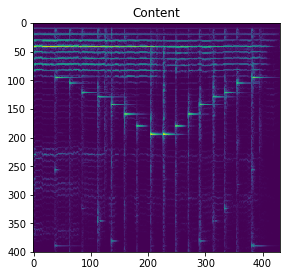

In [28]:
filename = './audio_files/ohm_scale.wav'
x, fs = librosa.load(filename)
n_fft = 2048

SA = wave_to_spectum(x, n_fft)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Content')
plt.imshow(S[:400,:])



## Griffith and Lim method

In [30]:
#a = np.zeros_like(a_content)
#a[:N_CHANNELS,:] = np.exp(result[0,0].T) - 1

def write_spectrum_wav(a):
    # This code is supposed to do phase reconstruction
    p = 2 * np.pi * np.random.random_sample(a.shape) - np.pi
    for i in range(1000):
        S = a * np.exp(1j*p)
        x = librosa.istft(S)
        p = np.angle(librosa.stft(x, N_FFT))
        if i %100 == 0: print(i/100, 'percent completed')
    return x

x_out = write_spectrum_wav(SA)

In [31]:
OUTPUT_FILENAME = 'out.wav'
librosa.output.write_wav(OUTPUT_FILENAME, x, fs)

In [32]:
from IPython.display import Audio, display

print OUTPUT_FILENAME
display(Audio(OUTPUT_FILENAME))

out.wav


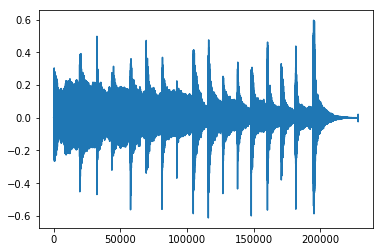

In [33]:
plt.plot(x)

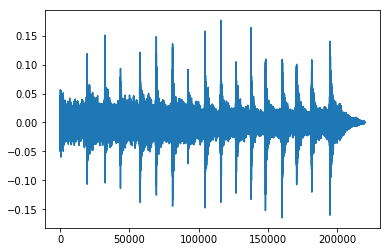

In [34]:
plt.plot(x_out)

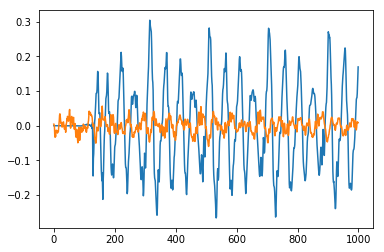

In [45]:
plt.plot(x[:1000])
plt.plot(x_out[:1000])

The Griffith and Lim method is not perfect reconstruction.
Let's compare this to directly inverting the complex specta from STFT.

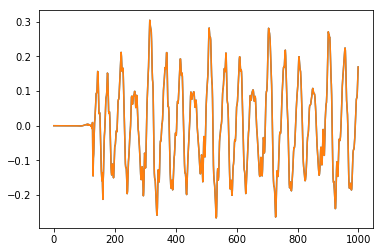

In [47]:
S = librosa.stft(x, n_fft)
x_inv = librosa.istft(S, n_fft)
plt.plot(x_inv[:1000])
plt.plot(x[:1000])